In [62]:
import pandas as pd

Edit this cell to read the file wanted. NOTE: will only work for csv files in the form of patient, features, outcome. 

In [63]:
filename = "selected_features_dyn.csv" # Add filename
data = pd.read_csv(filename) # Load in Data

Run the following cell for Random Forest Model:

Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
---------------- Random Forest ----------------
Root Mean Squared Error:  12.266528795808048


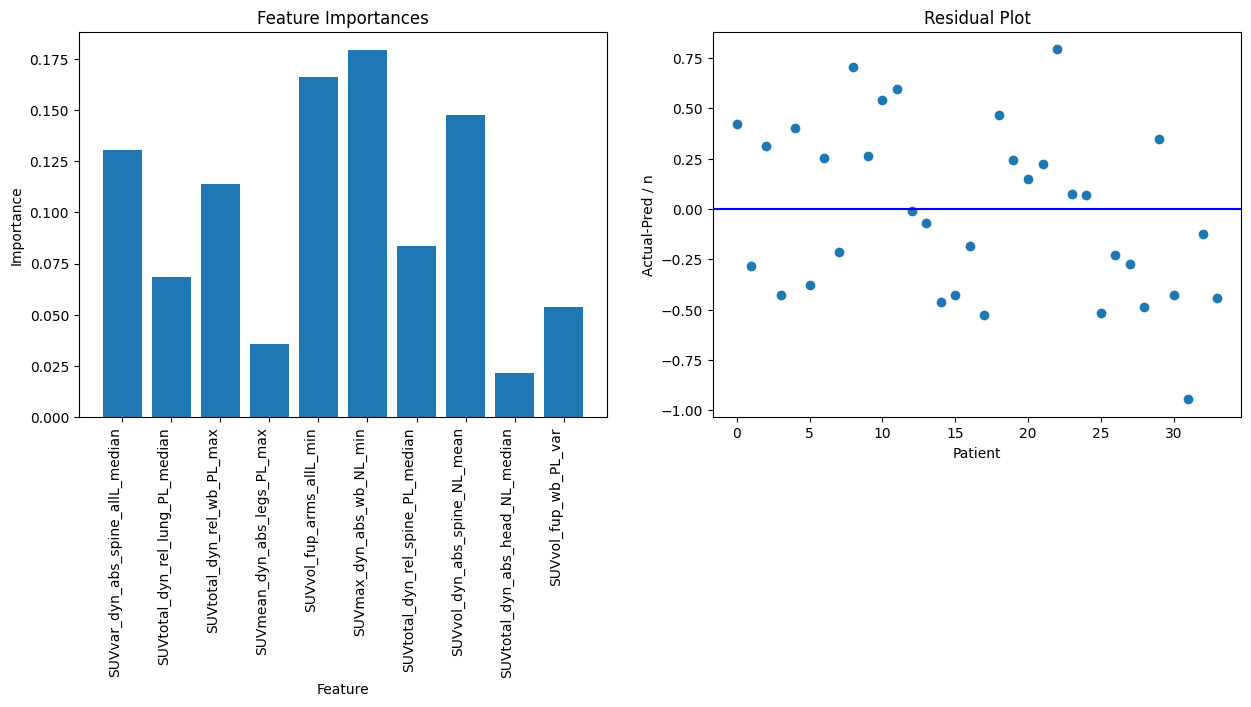

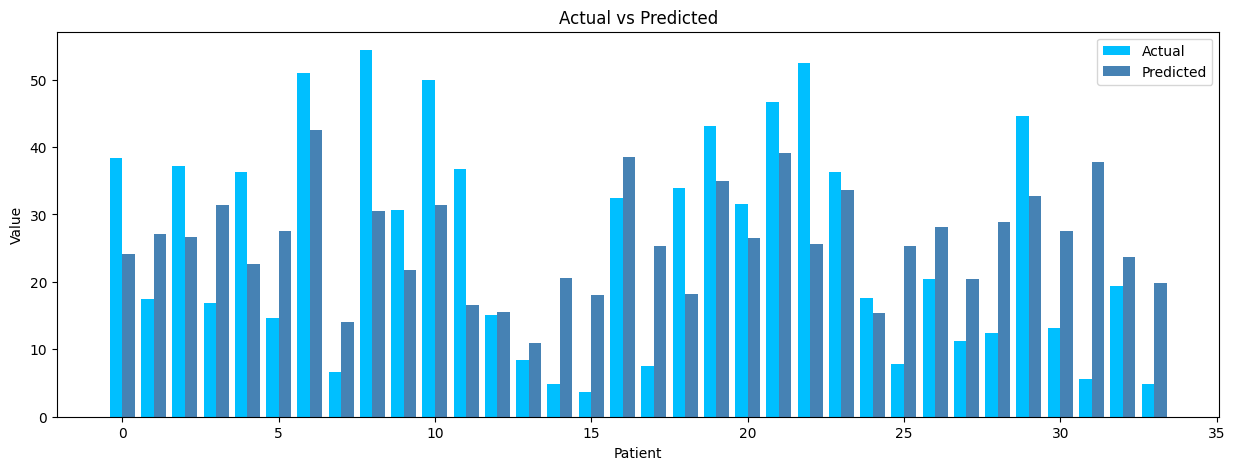

In [64]:
%run RF.py 
RF(data)

Run the following cell for LightGBM. Add the number of trials you want optuna to run to tune parameters. 

[I 2023-04-07 12:23:43,748] A new study created in memory with name: no-name-9cfae699-cf42-4c1f-9b80-c786350ea660
[I 2023-04-07 12:23:45,427] Trial 0 finished with value: 12.909939578996907 and parameters: {'n_estimators': 460, 'num_leaves': 52, 'learning_rate': 1.7337848908847404, 'max_depth': 23, 'min_child_samples': 3}. Best is trial 0 with value: 12.909939578996907.
[I 2023-04-07 12:23:45,820] Trial 1 finished with value: 6.462420397744525 and parameters: {'n_estimators': 62, 'num_leaves': 254, 'learning_rate': 0.4638439532924788, 'max_depth': 22, 'min_child_samples': 5}. Best is trial 1 with value: 6.462420397744525.
[I 2023-04-07 12:23:46,323] Trial 2 finished with value: 6.573156722892033 and parameters: {'n_estimators': 151, 'num_leaves': 121, 'learning_rate': 0.09736707161900153, 'max_depth': 2, 'min_child_samples': 4}. Best is trial 1 with value: 6.462420397744525.
[I 2023-04-07 12:23:47,779] Trial 3 finished with value: 8.285101941272204 and parameters: {'n_estimators': 491,

Best Parameters:  {'n_estimators': 62, 'num_leaves': 254, 'learning_rate': 0.4638439532924788, 'max_depth': 22, 'min_child_samples': 5}
Best Scorre: 6.462420397744525
Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
------------ LightGBM ------------
RMSE:  11.703229103322638


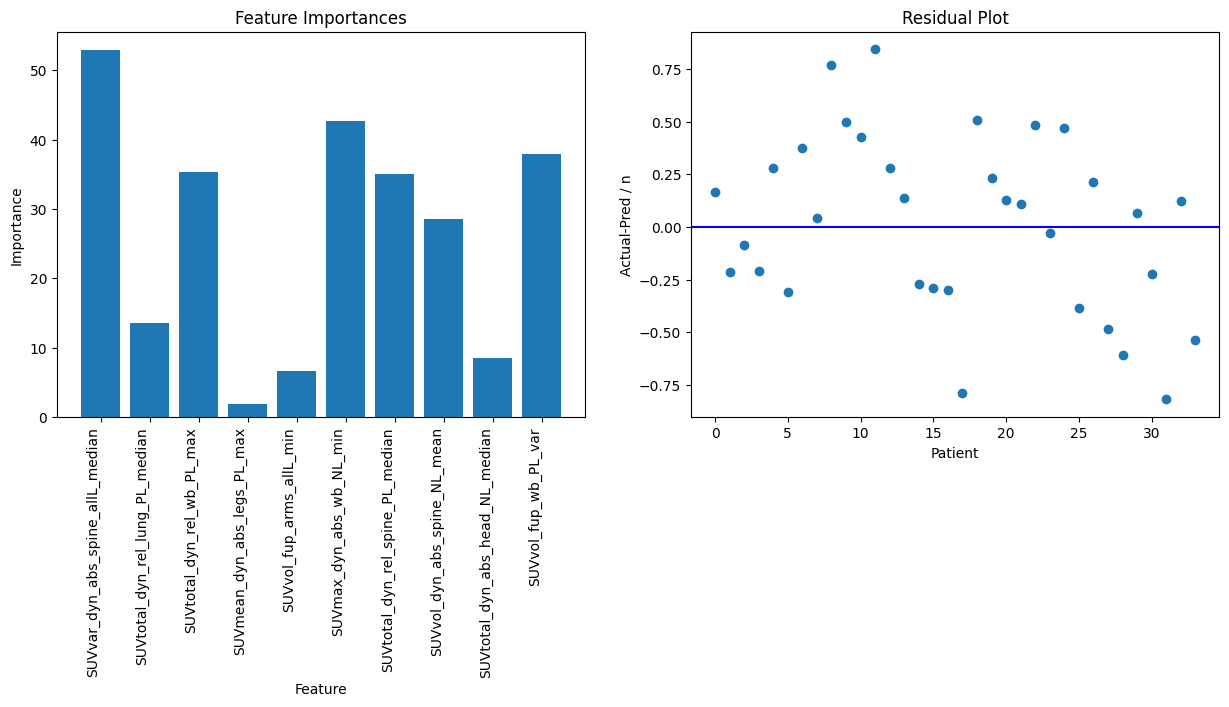

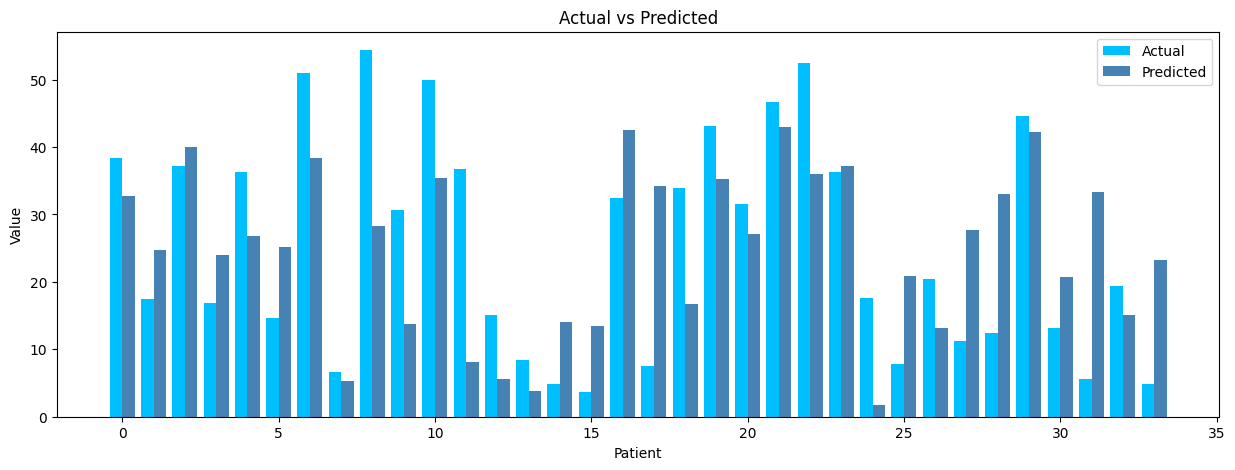

Actual: , 38.4, 17.5, 37.2, 16.9, 36.3, 14.7, 51.0, 6.7, 54.4, 30.7, 49.9, 36.8, 15.1, 8.4, 4.9, 3.6, 32.4, 7.5, 34.0, 43.2, 31.5, 46.7, 52.5, 36.2, 17.6, 7.8, 20.4, 11.2, 12.4, 44.6, 13.1, 5.6, 19.3, 4.9
Predct: , 32.8, 24.7, 40.0, 24.0, 26.7, 25.1, 38.3, 5.3, 28.2, 13.7, 35.3, 8.1, 5.6, 3.8, 14.0, 13.5, 42.5, 34.2, 16.7, 35.2, 27.1, 43.0, 36.0, 37.2, 1.7, 20.9, 13.2, 27.7, 33.0, 42.3, 20.6, 33.4, 15.1, 23.2


In [65]:
%run LightGBM.py 
# add your number of trails for optuna. longer trials -> better parameters, but longer runtime
n_trails = 5
lightGBMLOOOptuna(data, n_trails)

Run the follwing cell for XGBoost. 

[I 2023-04-07 12:23:49,777] A new study created in memory with name: no-name-7abdc86c-bfaa-4806-aeae-847e703dc07e
[I 2023-04-07 12:23:51,801] Trial 0 finished with value: 9.737839064683563 and parameters: {'max_depth': 6, 'learning_rate': 0.8861968802378348, 'n_estimators': 229, 'min_child_weight': 4, 'gamma': 0.09140737648220285, 'subsample': 0.615217636936372, 'colsample_bytree': 0.8697972670247284, 'reg_alpha': 0.7664600961314066, 'reg_lambda': 0.3658112899725732}. Best is trial 0 with value: 9.737839064683563.
[I 2023-04-07 12:23:52,793] Trial 1 finished with value: 10.710612128793782 and parameters: {'max_depth': 1, 'learning_rate': 0.02024448753138241, 'n_estimators': 133, 'min_child_weight': 10, 'gamma': 0.1458448424775078, 'subsample': 0.5767584457310309, 'colsample_bytree': 0.6255324526203948, 'reg_alpha': 0.2266496591496305, 'reg_lambda': 0.3883698596767129}. Best is trial 0 with value: 9.737839064683563.
[I 2023-04-07 12:23:53,494] Trial 2 finished with value: 10.44593836594

Best Parameters:  {'max_depth': 4, 'learning_rate': 0.14544520478648335, 'n_estimators': 354, 'min_child_weight': 2, 'gamma': 0.5576961430270166, 'subsample': 0.2617481969079099, 'colsample_bytree': 0.8027398753111838, 'reg_alpha': 0.9188964588525965, 'reg_lambda': 0.43879287266556516}
Best Scorre: 5.690087944619568
Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
------------ XGBoost ------------
RMSE:  12.309313665380786


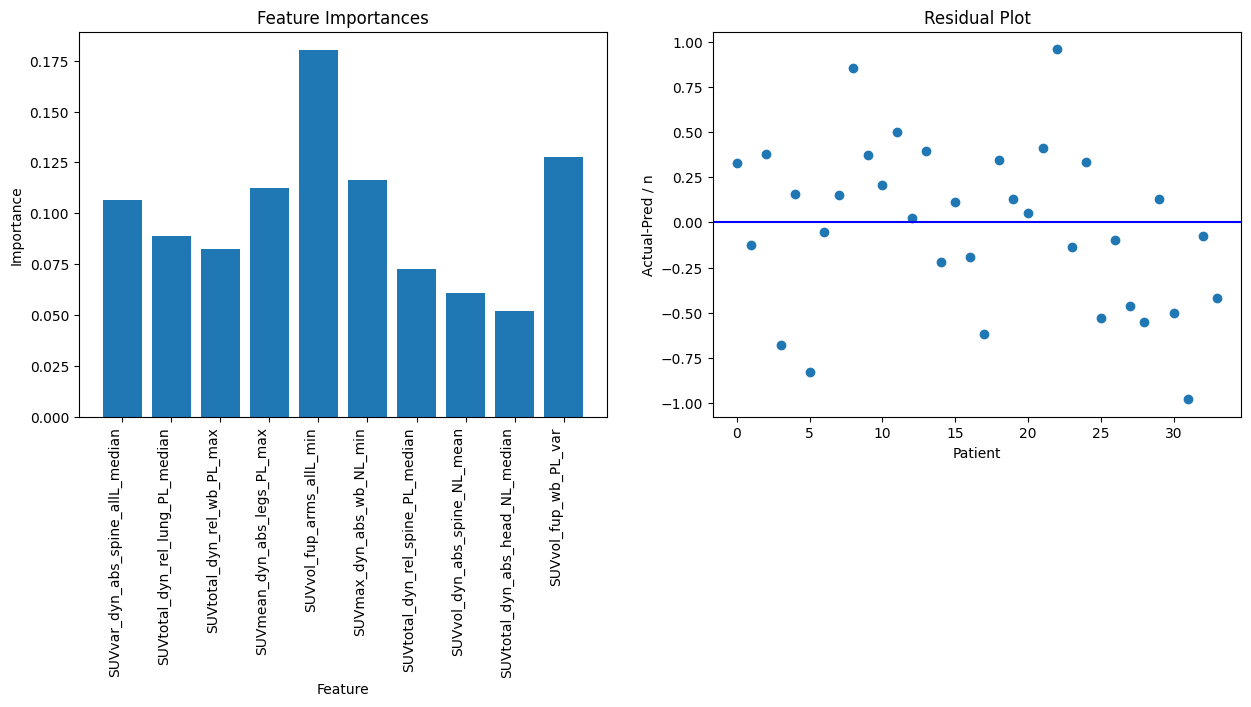

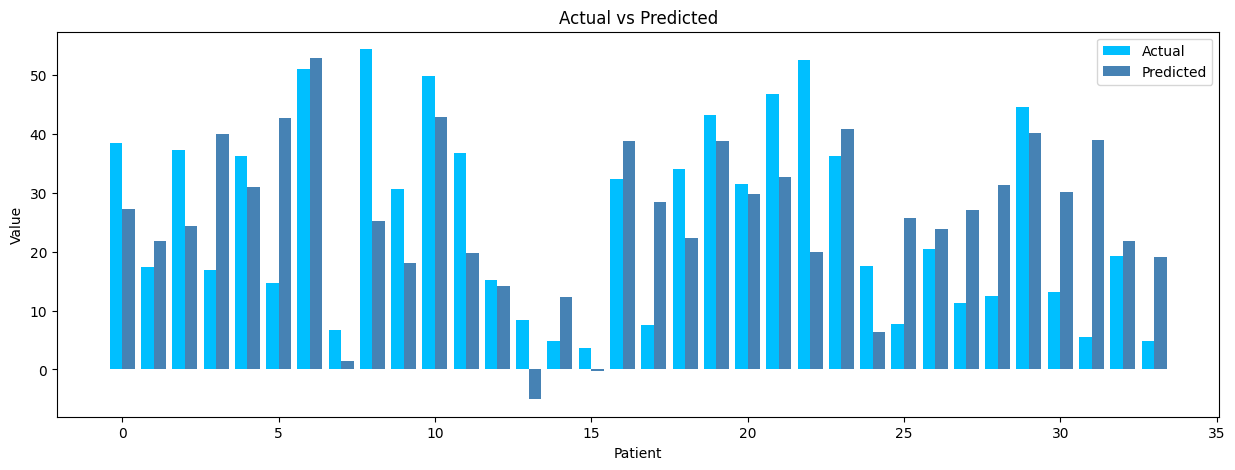

Actual: , 38.4, 17.5, 37.2, 16.9, 36.3, 14.7, 51.0, 6.7, 54.4, 30.7, 49.9, 36.8, 15.1, 8.4, 4.9, 3.6, 32.4, 7.5, 34.0, 43.2, 31.5, 46.7, 52.5, 36.2, 17.6, 7.8, 20.4, 11.2, 12.4, 44.6, 13.1, 5.6, 19.3, 4.9
Predct: , 27.2, 21.8, 24.4, 39.9, 31.0, 42.7, 52.9, 1.5, 25.2, 18.0, 42.9, 19.8, 14.2, -5.1, 12.3, -0.3, 38.8, 28.4, 22.3, 38.7, 29.7, 32.6, 19.9, 40.8, 6.3, 25.7, 23.8, 27.0, 31.2, 40.1, 30.2, 38.9, 21.8, 19.1


In [66]:
%run XGBoost.py 
n = 5 # edit the number of trials
lightGBMLOOOptuna(data, n)

Run the following cell for MultiLinearRegression. With no Feature Importance function built into the model I excluded that graph. However, it is possible to create it in the future, if needed. 

------------ LightGBM ------------
RMSE:  11.40331889650072


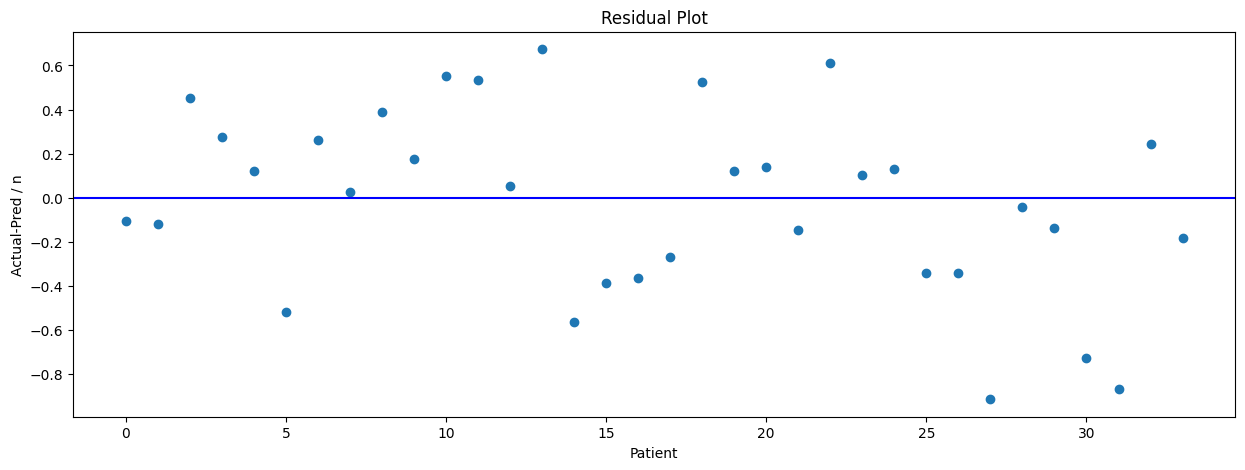

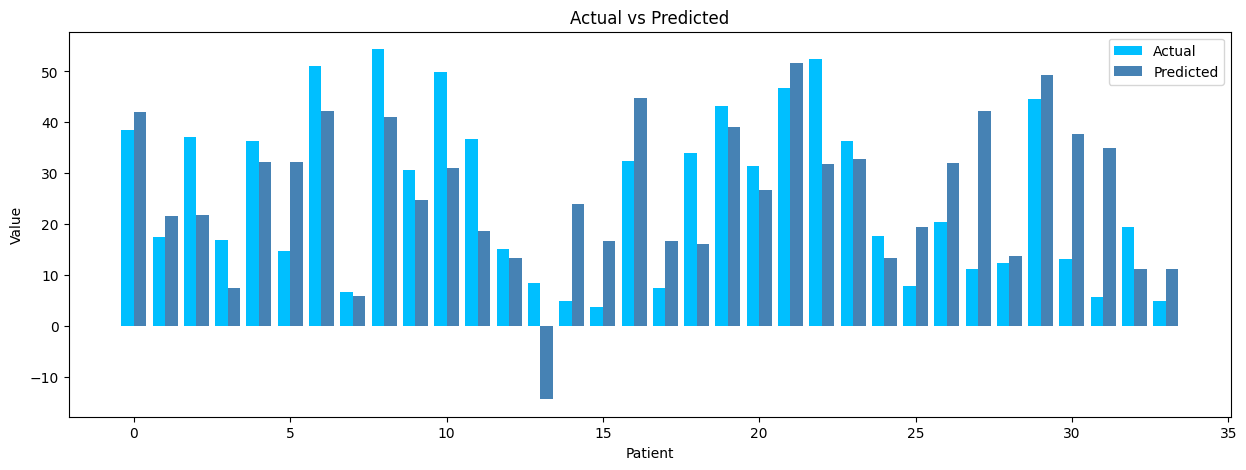

In [68]:
%run MultiLinearRegression.py 
MLR(data)